In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [6]:
# Download NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

# Load dataset
df = pd.read_csv("/content/sample_data/IMDB_Dataset.csv")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [7]:
# Display dataset info
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [9]:
# Text Preprocessing Function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return " ".join(tokens)

# Apply preprocessing
df['processed_review'] = df['review'].apply(preprocess_text)

In [10]:
# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df['processed_review'])

In [11]:
# Find optimal number of clusters using Elbow Method
inertia = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_tfidf)
    inertia.append(kmeans.inertia_)

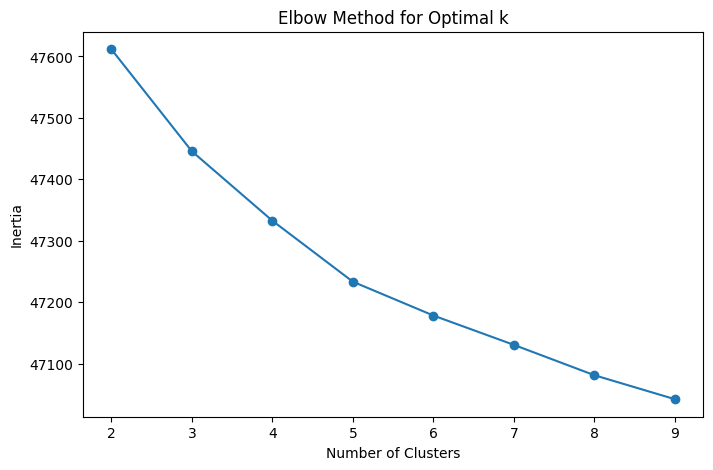

In [12]:
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [13]:
# Choose optimal k (based on elbow method, let’s assume k=5)
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_tfidf)

# Compute silhouette score
sil_score = silhouette_score(X_tfidf, df['cluster'])
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.0021


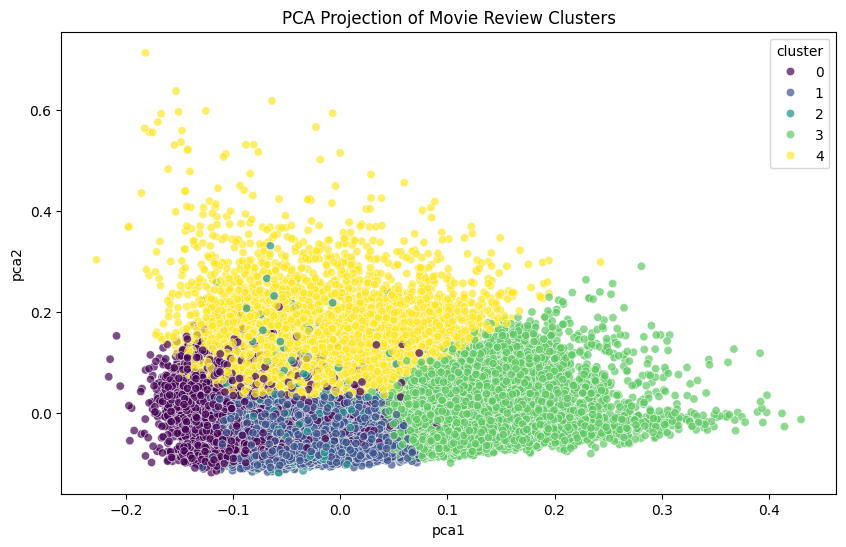

In [14]:
# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(x='pca1', y='pca2', hue=df['cluster'], palette='viridis', data=df, alpha=0.7)
plt.title("PCA Projection of Movie Review Clusters")
plt.show()